# MACHINE LEARNING PROJECT

# Project Name: House Price Prediction Using Machine Learning

# Project by- Rohini Hemraj Bhondekar

# Guided by- Sameer Warsolkar Sir

# Abstract
This project focuses on developing a predictive model for house prices using various machine learning algorithms. The objective is to identify the most accurate algorithm for predicting house prices based on features such as square footage, number of bedrooms, number of bathrooms, neighborhood, and year built. The study evaluates the performance of multiple regression algorithms including Linear Regression, Decision Tree, Random Forest Classifier, K-Nearest Neighbors (KNN) Regressor, Ridge Regression, Lasso Regression, and Support Vector Regressor.Demonstrated superior prediction accuracy, making it the preferred choice for house price prediction in this project.

In [36]:
#importing libraries that are essential for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [37]:
# loading the dataset
data=pd.read_csv("housing_price.csv")
data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.2836
1,2459,3,2,Rural,1980,195014.2216
2,1860,2,1,Suburb,1970,306891.0121
3,2294,2,1,Urban,1996,206786.7872
4,2130,5,2,Suburb,2001,272436.2391
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.8659
49996,2854,2,2,Suburb,1988,374507.6567
49997,2979,5,3,Suburb,1962,384110.5556
49998,2596,5,2,Rural,1984,380512.6860


In [38]:
# Displays default first 5 rows.
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.2836
1,2459,3,2,Rural,1980,195014.2216
2,1860,2,1,Suburb,1970,306891.0121
3,2294,2,1,Urban,1996,206786.7872
4,2130,5,2,Suburb,2001,272436.2391


In [39]:
# gives the description of main statistical measures.
data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224838.070900
std,575.513241,1.116326,0.815851,20.719377,76110.105518
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860250
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141150
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630025
max,2999.000000,5.000000,3.000000,2021.000000,492195.260000


In [40]:
#This part calculates the sum of True values for each column, effectively counting the number of missing values in each column. 
data.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [41]:
# provides the information about the DataFrame's structure, data types, and memory usage. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [42]:
#This line is used to check the Top 2 columns 
data.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.2836
1,2459,3,2,Rural,1980,195014.2216


In [43]:
# States the type of data present for each and every column.
data.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

# Data Visualization

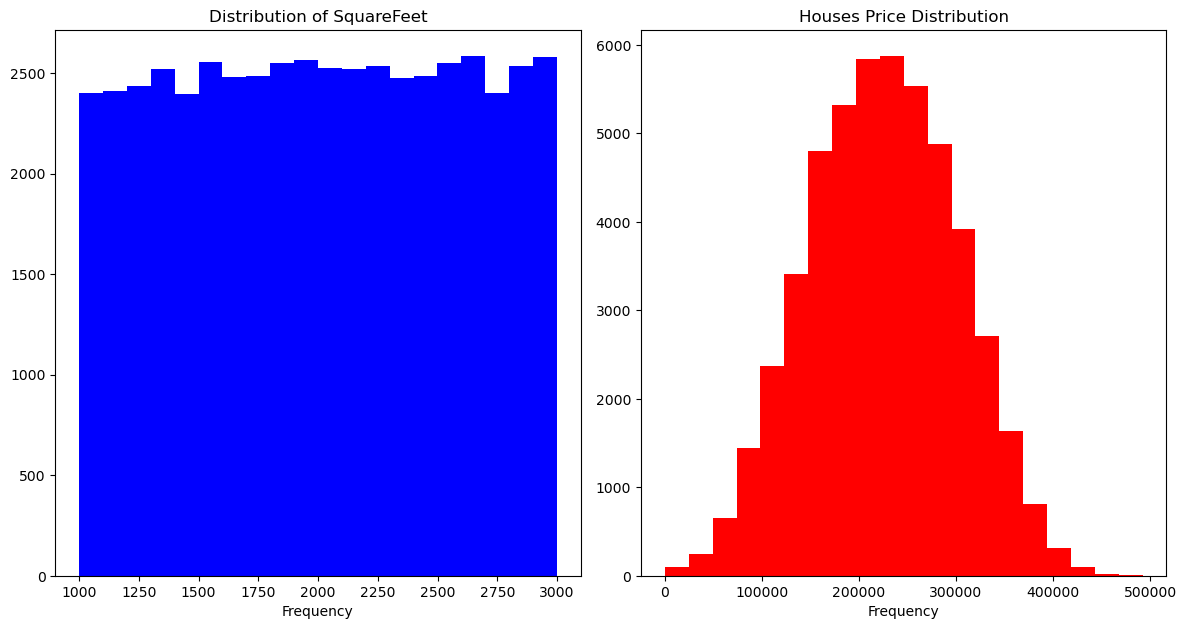

In [44]:
#In this step we will set the figsize and decide how much bins we want and in which colour,we are also giving heading for x axis, y axis and giving the title for the whole graph.
plt.figure(figsize=[12,12])
plt.subplot(221)
# Histogram for SquareFeet distribution
plt.hist(data['SquareFeet'],bins=20,color='blue')
plt.xlabel("SquareFeet")
plt.xlabel("Frequency")
plt.title("Distribution of SquareFeet")
# Histogram for Price distribution
plt.subplot(222)
plt.hist(data['Price'],bins=20,color='red')
plt.xlabel("Houses Price")
plt.xlabel("Frequency")
plt.title("Houses Price Distribution")

plt.tight_layout()
plt.show()


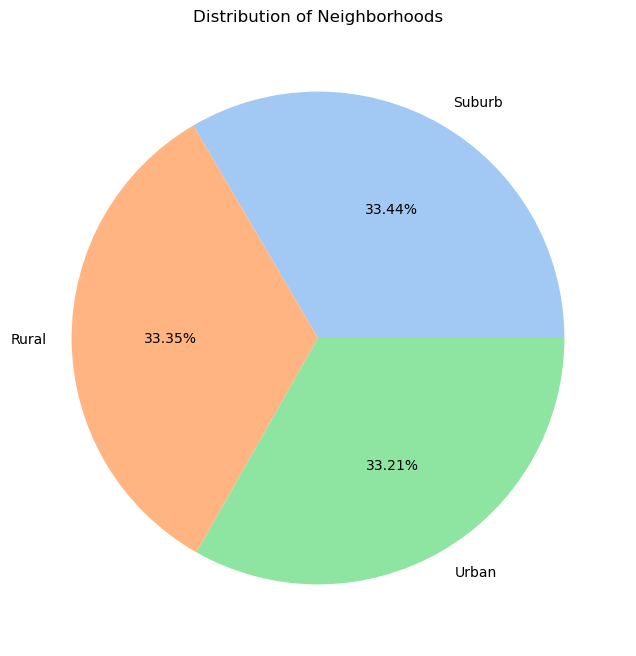

In [45]:
# This code for creating a pie chart to visualize the distribution of neighborhoods 
df = pd.DataFrame({
    'Neighborhood': ['Rural'] * 16677 + ['Urban'] * 16604 + ['Suburb'] * 16722
})

# Count the occurrences of each neighborhood
neighborhood_counts = pd.Series(data['Neighborhood']).value_counts()

# Define the color palette
colors = sns.color_palette('pastel')[0:len(neighborhood_counts)]

# Create the pie chart
plt.figure(figsize=[8, 8])
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.2f%%', colors=colors)
plt.title("Distribution of Neighborhoods")
plt.show()

In [24]:
#above chart distributed value equally
#Rural: 16677
#Urban:16604
#Suburb:16722
#Total:50003

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')


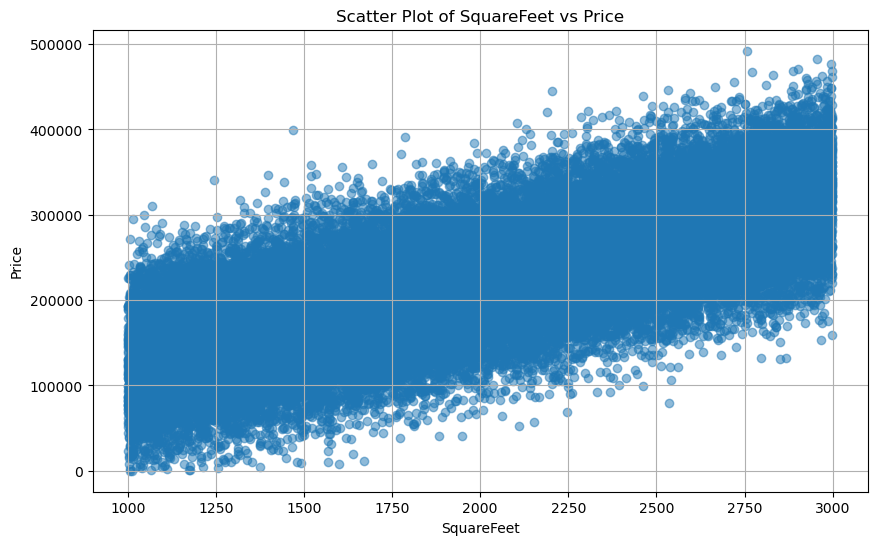

In [46]:
# Aims to create a scatter plot to visualize the relationship between SquareFeet and Price
plt.subplot
# Verify column names
print(data.columns)

# Create the figure and subplot
plt.figure(figsize=[10, 6])
plt.subplot(111)  # Single subplot in a 1x1 grid

# Scatter plot
plt.scatter(data['SquareFeet'], data['Price'], alpha=0.5)

# Add labels and title
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.title('Scatter Plot of SquareFeet vs Price')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Above chart show the positive correlation

In [15]:
# Values close to 1 indicate a strong positive correlation. Values close to -1 indicate a strong negative correlation. 
# Values close to 0 indicate no correlation. Annotations: The annot=True parameter ensures that the correlation values are displayed on the heatmap cells.

In [16]:
# If the Price values are not appearing in the heatmap's columns, it may be due to the way the pivot table is created or how the data is structured.To # visualize the relationship between SquareFeet and Price more effectively, especially if you want to see how Price varies with SquareFeet, you can use a scatter plot with a heatmap overlay to show density or a simple correlation heatmap

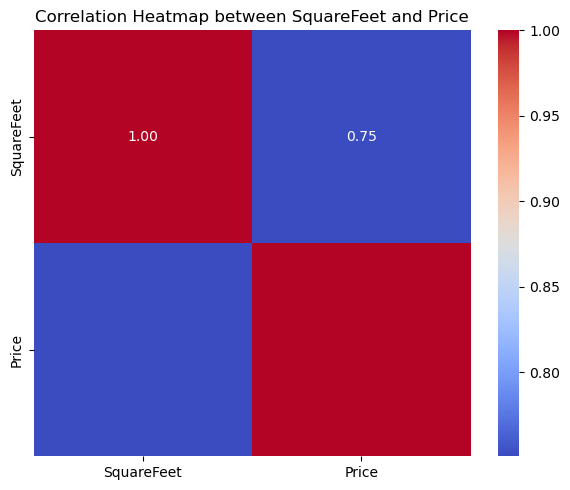

In [47]:
# code computes the correlation matrix between SquareFeet and Price and visualizes it using a heatmap.
# Method 2: Simple Correlation Heatmap
plt.subplot
df2 = pd.DataFrame(data)

# Compute the correlation matrix
corr = df2[['SquareFeet', 'Price']].corr()

# Create the heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between SquareFeet and Price')
plt.tight_layout()
plt.show()


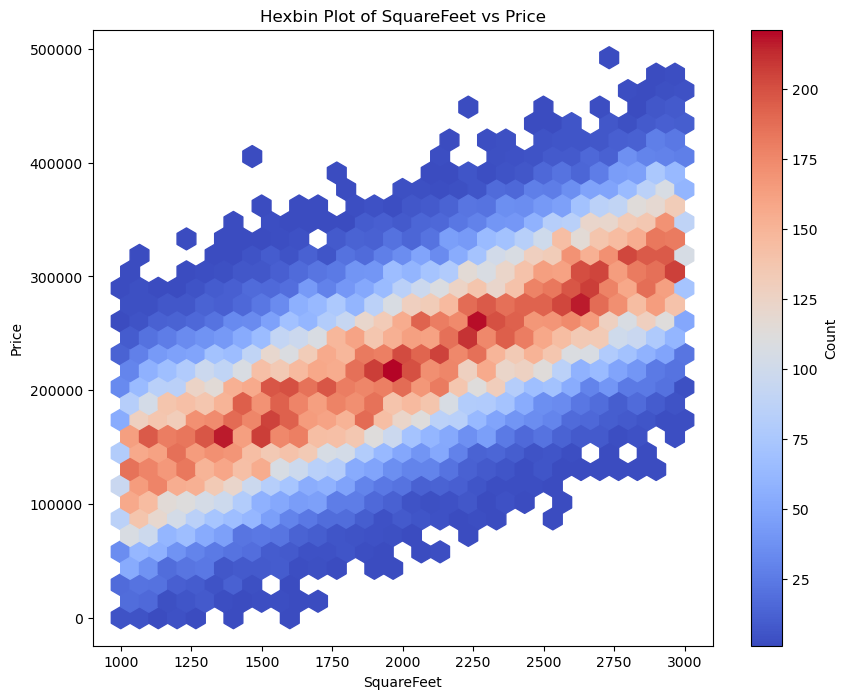

In [48]:
# Method 1: Scatter Plot with Heatmap Overlay
plt.subplot
df2 = pd.DataFrame(data)
plt.figure(figsize=(10, 8))
plt.hexbin(df2['SquareFeet'], df2['Price'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.title('Hexbin Plot of SquareFeet vs Price')
plt.show()

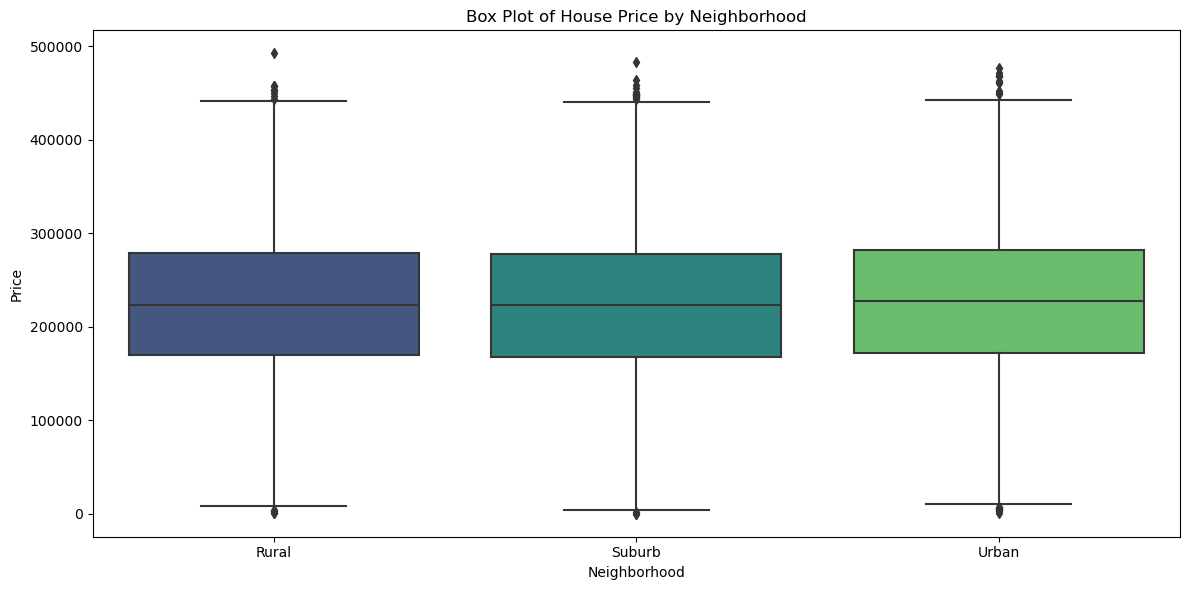

In [56]:
# creates a box plot to visualize the distribution of house prices across different neighborhoods.
plt.figure(figsize=[12, 6])
sns.boxplot(x='Neighborhood', y='Price', data=data, palette='viridis')
plt.title('Box Plot of House Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

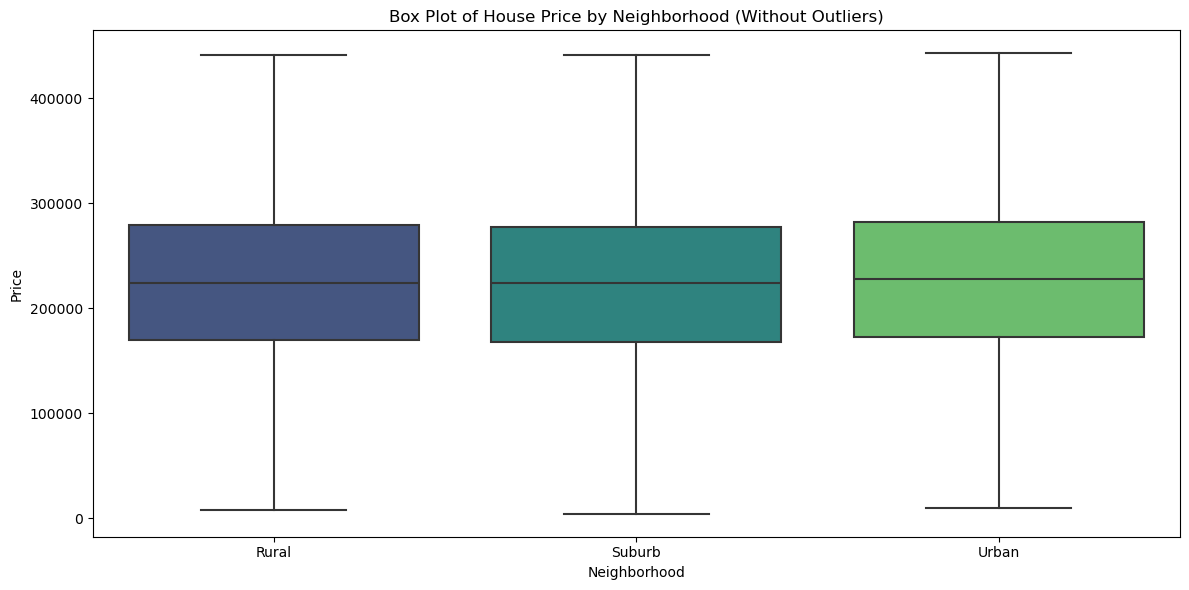

In [57]:

df = pd.DataFrame(data)

# Function to remove outliers using IQR method for each group
def remove_outliers(group):
    Q1 = group['Price'].quantile(0.25)
    Q3 = group['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['Price'] >= lower_bound) & (group['Price'] <= upper_bound)]

# Apply the function to each group
df_filtered = df.groupby('Neighborhood').apply(remove_outliers).reset_index(drop=True)

# Create a box plot to visualize the distribution of house prices across different neighborhoods
plt.figure(figsize=[12, 6])
sns.boxplot(x='Neighborhood', y='Price', data=df_filtered, palette='viridis')
plt.title('Box Plot of House Price by Neighborhood (Without Outliers)')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


In [ ]:
# successfully remove all the outliers

# Label Encoder converting categorical data into numeric form

In [58]:
#Here,we have used LabelEncoder class, is created and assigned to the variable l1. This step will be used to perform label encoding.The fit_transform method of the LabelEncoder class is applied to the 'Neighborhood' column of the DataFrame data. This method fits the encoder to the unique values in the 'Neighborhood' column and then transforms those values into numerical labels. 
from sklearn.preprocessing import LabelEncoder
l1= LabelEncoder()
label=l1.fit_transform(data['Neighborhood'])
l1.classes_

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [59]:
label

array([0, 0, 1, ..., 1, 0, 0])

In [60]:
#We have made use of data['Neighborhood_label'] = label is assigning the encoded labels obtained from the LabelEncoder to a new column named 'Neighborhood_label' in the DataFrame data.
data['Neighborhood_label']=label

In [61]:
data.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Neighborhood_label
0,2126,4,1,Rural,1969,215355.2836,0
1,2459,3,2,Rural,1980,195014.2216,0


# Creating dependent and independent variable

In [62]:
y=data['Price']
y.head(1)

0    215355.2836
Name: Price, dtype: float64

In [63]:
#in this step we are creating a new DataFrame x by dropping the specified columns 
x=data.drop(['YearBuilt','Bathrooms','Bedrooms','Neighborhood'],axis=1)
x.head(1)

,SquareFeet,Price,Neighborhood_label
0,2126,215355.2836,0


# Training Dataset

In [64]:
#The train_test_split is a function that is commonly used to split a dataset into training and testing sets for machine learning.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [65]:
# here this step gives you the number of samples (rows) in your training set. 
len(x_train)

40000

In [66]:
len(y_test)

10000

In [67]:
len(data)

50000

In [68]:
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Neighborhood_label
0,2126,4,1,Rural,1969,215355.2836,0
1,2459,3,2,Rural,1980,195014.2216,0
2,1860,2,1,Suburb,1970,306891.0121,1
3,2294,2,1,Urban,1996,206786.7872,2
4,2130,5,2,Suburb,2001,272436.2391,1


In [69]:
#it shows the default last 5 rows of the dataset. 
data.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Neighborhood_label
49995,1282,5,3,Rural,1975,100080.8659,0
49996,2854,2,2,Suburb,1988,374507.6567,1
49997,2979,5,3,Suburb,1962,384110.5556,1
49998,2596,5,2,Rural,1984,380512.6860,0
49999,1572,5,3,Rural,2011,221618.5832,0


# Standard Scaler Method

In [70]:
#An instance of the StandardScaler class is created. This instance will be used to scale (standardize) the features.The fit_transform method of the StandardScaler class is applied to the training set (x_train). This method computes the mean and standard deviation necessary for standardization and then transforms the features in the training set using these computed values.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Linear Regression Algorithm

In [71]:
#The LinearRegression class is created and assigned to the variable linreg. This instance will be used to build the linear regression model.
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
pred=linreg.predict(x_test)

# Accuracy score of Linear Regression


In [72]:
#This step is used to check the accuracy.
from sklearn.metrics import r2_score
lr=r2_score(y_test,pred)*100
print(lr)

99.99598345643305


# Decision Tree Regressor algorithm

In [73]:
# here the DecisionTreeRegressor class is created and assigned to the variable reg. 
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred1=reg.predict(x_test)

# Accuracy score of Decision Tree regressor model

In [74]:
# This step is used to check the accuracy score.
from sklearn.metrics import r2_score
dtr=r2_score(y_test,pred1)*100
print(dtr)

99.9945342743417


# Random Forest Regressor Algorithm

In [77]:
#the RandomForestRegressor, creating an instance of 50 (n_estimators=50), fits the model to the training data, and then predicts the target variable on the testing set , storing the predictions in the variable pred2. 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)

# Accuracy score of Random Forest Regressor Model

In [78]:
# This step is used to check the accuracy score.
from sklearn.metrics import r2_score
rfr=r2_score(y_test,pred2)*100
print(rfr)

99.99594693673346


# K-Neighbors Regressor Algorithm

In [79]:
# the KNeighborsRegressor, creates an instance with 5 neighbors (n_neighbors=5), fits the model to the training data (knn.fit(x_train, y_train)), and then predicts the target variable on the testing set (pred3 = knn.predict(x_test)), storing the predictions in the variable pred3.
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)

# Accuracy score of KNN regerssor model

In [80]:
# This step is used to check the accuracy score.
from sklearn.metrics import r2_score
knn=r2_score(y_test,pred3)*100
print(knn)

99.98441700743098


# Lasso regression algorithm

In [81]:
#the Lasso regression model, creates an instance (lassoreg = Lasso()), fits the model to the training data (lassoreg.fit(x_train, y_train)), and then predicts the target variable on the testing set (pred4 = lassoreg.predict(x_test)), storing the predictions in the variable pred4.
from sklearn.linear_model import Lasso
lassoreg=Lasso()
lassoreg.fit(x_train,y_train)
pred4=lassoreg.predict(x_test)

# Accuracy Score of Lasso Algorithm

In [82]:
#This step is used to check the accuracy score.
lasso=r2_score(y_test,pred4)*100
print(lasso)

99.99599866679839


# Ridge regression algorithm

In [83]:
#The code uses the Ridge regression model, creates an instance (ridreg = Ridge()), fits the model to the training data (ridreg.fit(x_train, y_train)), and then predicts the target variable on the testing set (pred4 = ridreg.predict(x_test)), storing the predictions in the variable pred4.
from sklearn.linear_model import Ridge
ridreg=Ridge()
ridreg.fit(x_train,y_train)
pred4=ridreg.predict(x_test)

# Accuracy Score of Ridge Algorithm

In [84]:
from sklearn.metrics import r2_score
rid=r2_score(y_test,pred4)*100
print(rid)

99.99601325286697


# SVR algorithm

In [85]:
#the Support Vector Machine for Regression (SVR), creates an instance (svr = SVR()), fits the model to the training data (svr.fit(x_train, y_train)), and then predicts the target variable on the testing set (pred5 = svr.predict(x_test)), storing the predictions in the variable pred5. 
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred5=svr.predict(x_test)

In [86]:
svrscore=r2_score(y_test,pred5)*100
print(svrscore)

11.476164396259547


# Overall accuracy Score

In [87]:
#This step is used to check which model gives us the best accuracy.
print("LinearRegression",lr)
print("DecisionTree",dtr)
print("RandomForestClassifier",rfr)
print("KNN Regressor",knn)
print("Ridge Linear model",rid)
print("Lasso Linear model",lasso)
print("SupportVectorRegressor",svrscore)


LinearRegression 99.99598345643305
DecisionTree 99.9945342743417
RandomForestClassifier 99.99594693673346
KNN Regressor 99.98441700743098
Ridge Linear model 99.99601325286697
Lasso Linear model 99.99599866679839
SupportVectorRegressor 11.476164396259547


In [52]:
# R-squared scores for different models
linear_regression_score = 99.99566712529273
decision_tree_score = 99.99558367052539
random_forest_score = 99.99560717247505
knn_regressor_score = 99.98375657918228
ridge_score = 99.99569808075913
lasso_score = 99.99568292671869
svr_score = 11.467835568047025

# Finding the highest accuracy
model_scores = {
    "Linear Regression": linear_regression_score,
    "Decision Tree": decision_tree_score,
    "Random Forest": random_forest_score,
    "KNN Regressor": knn_regressor_score,
    "Ridge": ridge_score,
    "Lasso": lasso_score,
    "Support Vector Regressor": svr_score
}

# Determine the model with the highest accuracy
best_model = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model]

print(f"The model with the highest accuracy is {best_model} with an R-squared score of {best_score:.5f}%")



The model with the highest accuracy is Ridge with an R-squared score of 99.99570%


# Conclusion

So here we apply all Regression Algorithm one by one on available data, we can conclude that we get better accuracy in Ridge  algorithm. Its 99.99570% , when we apply ridge algorithm on model for prediction we get better prediction as compare to other algorithm.We did apply scaling method on data,because when we use scaling data for algorithm that time we are getting high accuracy as compared to normal data..

# Prediction Part

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the dataset (replace with your actual data file)
# df = pd.read_csv('house_prices.csv')

# Simulating loading of data (you should replace this with actual data loading)
data = {
    'SquareFeet': np.random.randint(500, 5000, 100),
    'Bedrooms': np.random.randint(1, 6, 100),
    'Bathrooms': np.random.randint(1, 4, 100),
    'Neighborhood': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'YearBuilt': np.random.randint(1950, 2020, 100),
    'Price': np.random.randint(100000, 1000000, 100)
}
df = pd.DataFrame(data)

# Preprocess the data
le = LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])

X = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']]
y = df['Price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

# Define the prediction function
def prediction():
    square_feet = float(input("Enter the square footage: "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = int(input("Enter the number of bathrooms: "))
    neighborhood = input("Enter the neighborhood (A, B, C, or D): ")
    year_built = int(input("Enter the year the house was built: "))

    # Encode and scale the input
    neighborhood_encoded = le.transform([neighborhood])[0]
    input_data = scaler.transform([[square_feet, bedrooms, bathrooms, neighborhood_encoded, year_built]])
    
    # Predict the price
    price = rf.predict(input_data)
    
    print("Approximately Price of the House is:", price[0])

# Call the prediction function
prediction()


Enter the square footage:  500
Enter the number of bedrooms:  1
Enter the number of bathrooms:  1
Enter the neighborhood (A, B, C, or D):  C
Enter the year the house was built:  2020


Approximately Price of the House is: 429508.14


C:\Users\Rohini\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
